[1.338, 1.651, 2.372, 2.684, 3.406, 3.718, 4.441, 4.75, 5.478, 5.782, 6.515, 6.813, 7.558, 7.844, 8.14, 8.876, 9.172, 9.907, 10.201, 10.499, 11.23, 11.539, 12.256, 12.573, 13.283, 13.601, 14.307, 14.625, 15.333, 15.649, 16.357, 16.672, 17.382, 17.695, 18.406, 18.717, 19.431, 19.74, 20.456, 20.76, 21.485, 21.783, 22.517, 22.806, 23.099, 23.828, 24.124, 24.854, 25.151, 25.447, 26.183, 26.497, 27.219, 27.54, 28.256, 28.576, 29.295, 29.61, 30.332, 30.644, 31.368, 31.674, 32.403, 32.703, 33.438, 33.732, 34.472, 34.758, 35.507, 35.784, 36.064, 36.808, 37.092, 37.833, 38.121, 38.413, 39.152, 39.469, 40.187, 40.515, 41.223, 41.551]


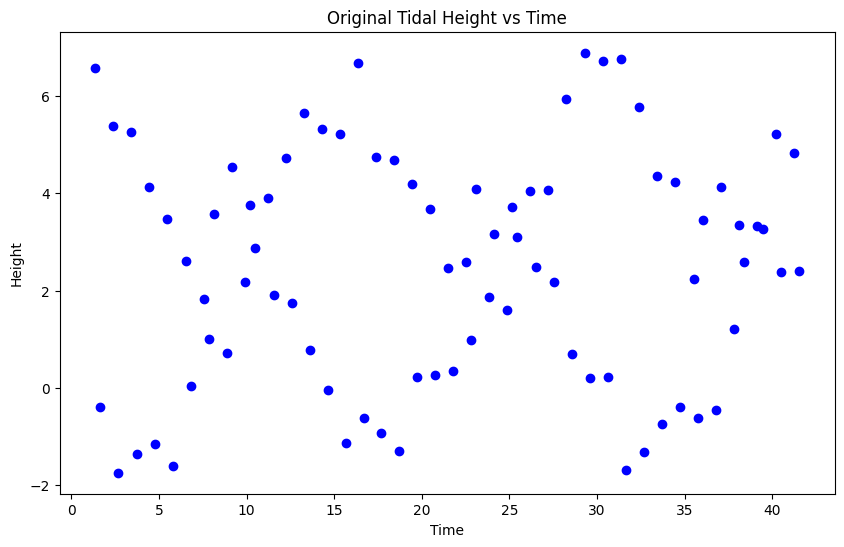

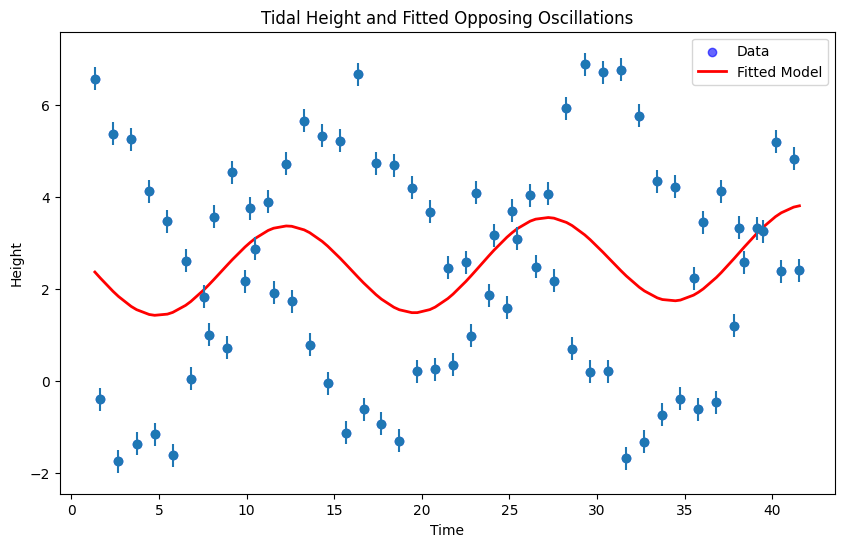

First few Time and Height values:
Time: [1.338 1.651 2.372 2.684 3.406]
Height: [ 6.57 -0.39  5.38 -1.74  5.26]


<Figure size 640x480 with 0 Axes>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the file
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype=[('myint', 'i8'), ('mystring', 'U6'), ('myfloat', 'f8')])

# Setting empty lists to fill up with column data
day = []
time = []
height = []

#pass in a string time to convert to minutes
def convertTimeToNum(t):
  hours, minutes, = map(int, t) #use map to convert strings to ints
  return (hours + minutes/60)/24

# Looping over every row and extracting the relevant data
for i in range(82):
    day.append(data[i][0])
    t = convertTimeToNum(data[i][1].split(":")) #grab time

    #combine = f"{data[i][0]}.{t}" #combine into decimal
    combine = float(data[i][0] + t)
    time.append(round(combine,3))
    height.append(data[i][2])

print(time)



    
# Convert the lists to numpy arrays for easier manipulation
time = np.array(time)
height = np.array(height)

# Plotting the original data
plt.figure(figsize=(10, 6))
plt.scatter(time, height, color='b', label="Data")
plt.xlabel("Time")
plt.ylabel("Height")
plt.title("Original Tidal Height vs Time")
plt.show()


# Define the oscillatory model function with two distinct opposing oscillations
def tidal_model(t, amp1, amp2, freq1, freq2, phase1, phase2,vert1, vert2):
   
    # Two oscillations with opposite phases
    return (amp1 * np.cos(freq1 * (t) + phase1) + vert1) + (amp2 * np.cos(freq2 * (t) + phase2) + vert2)

# initial guess for amp1, amp2, freq1, freq2, phase1, phase2, vert1, vert2
p0 = [6.57, -0.39, 2 * np.pi / 12, 2 * np.pi / 24, 0, np.pi, 2.,2.] 

#define sigma for curve_fit
sigma = np.full(len(height), 0.25)

# Fit the model to the data using curve_fit
params, params_cov = curve_fit(tidal_model, day, height, p0=p0, sigma = sigma)

# Generate the fitted curve using the fitted parameters
fitted_heights = tidal_model(time, *params)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(time, height, color='b', label="Data", alpha=0.6)
plt.plot(time, fitted_heights, 'r-', label="Fitted Model", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Height")
plt.title("Tidal Height and Fitted Opposing Oscillations")
plt.legend()

#Error of 0.25
y_err = np.full(len(height), 0.25)
plt.errorbar(time, height,yerr=y_err,fmt='o')

#savefig

plt.show()
plt.savefig('Height_and_Fitted_Curve.pdf')
# Print out the first few values of the day and height data to check
print("First few Time and Height values:")
print(f"Time: {time[:5]}")
print(f"Height: {height[:5]}")